# Logistic regression exploration

First, I will use sklearns logistic regression to benchmark

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from gradient_descent import GradientDescent
from regression_cost_funcs import LogisticCost


[[4.09209144 4.15408643]]
[-5.48300656]
Prediction score:  0.917312


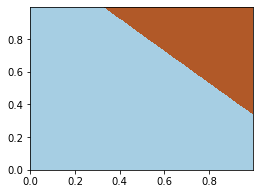

In [2]:
from data_generation import generate_data_binary

X, y = generate_data_binary(1000, seed=67)

# Perform logistic regression using sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y.ravel())
print(clf.coef_)
print(clf.intercept_)

# Create a mesh to plot in
h = .002  # step size in the mesh
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
design = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(design)
Z = Z.reshape(xx.shape)

def f(X):
    val = []
    r, c = X.shape
    for i in range(r):
        if X[i, 0] > 0.5 and X[i, 1] > 0.5:
            val.append(1)
        else:
            val.append(0)
    return np.array(val).reshape(-1, 1)
true_Z = f(design)
# print prediction score
print("Prediction score: ", clf.score(design, true_Z))

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()


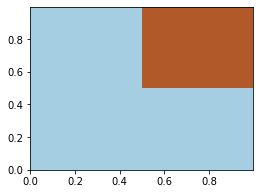

In [3]:
# Plot the true function 

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, true_Z.reshape(xx.shape), cmap=plt.cm.Paired)
plt.show()


In [4]:
#Now we will use use gradient descent to find the optimal beta values

X, y = generate_data_binary(1000, seed=67, add_col_ones=True)
# Initialize beta
beta = np.array([0, 0, 0]).reshape(-1, 1)

# Initialize cost function wrapper
model = LogisticCost()

# Initialize gradient descent
gd = GradientDescent()

# Run gradient descent
beta = gd.train(X, beta, y, model, learning_rate=0.01, n_epochs=1000)

In [5]:
#plot the decision boundary
y_pred = model.predict_class(X, beta)

print("Prediction score:", np.count_nonzero(y == y_pred) / len(y))

Prediction score: 0.925


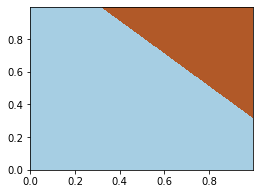

In [6]:
# Plot the decision boundary.

xmin, xmax = 0, 1
ymin, ymax = 0, 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
n = xx.size
design = np.c_[np.ones(n), xx.ravel(), yy.ravel()]
Z = model.predict_class(design, beta)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

## Wisconsin Cancer Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from feedforward_nn import NeuralNetwork
from gradient_descent import GradientDescent



In [8]:
def gradient_descent_execution(X, w0, z, model, mode="normal", max_iter = 200, eta = 0.01, batch_size = 10):
    store_extra = True

    gd = GradientDescent(batch_size=batch_size, store_extra=store_extra, mode=mode)
    w = gd.train(X, w0, z, model, eta, max_iter)
    return w, gd


In [9]:
# Load data
X_test = np.load("data/wbc/X_test.npy") # Test set
X_TR = np.load("data/wbc/X_TR.npy") # Whole training set
X_val = np.load("data/wbc/X_val.npy") # Validation set
X_train = np.load("data/wbc/X_train.npy") # Training set after validation split
z_test = np.load("data/wbc/z_test.npy") # Test set
z_TR = np.load("data/wbc/z_TR.npy") # Whole training set
z_val = np.load("data/wbc/z_val.npy") # Validation set
z_train = np.load("data/wbc/z_train.npy") # Training set after validation split


# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_TR = scaler.transform(X_TR)


print("X_train shape: ", X_train.shape)
print("z_train shape: ", z_train.shape)
print("X_test shape: ", X_test.shape)
print("z_test shape: ", z_test.shape)
print("X_val shape: ", X_val.shape)
print("z_val shape: ", z_val.shape)
print("X_TR shape: ", X_TR.shape)
print("z_TR shape: ", z_TR.shape)

X_train shape:  (364, 30)
z_train shape:  (364,)
X_test shape:  (114, 30)
z_test shape:  (114,)
X_val shape:  (91, 30)
z_val shape:  (91,)
X_TR shape:  (455, 30)
z_TR shape:  (455,)


Estimate using sklearn's logistic regression implementation

In [10]:
logistic = LogisticRegression()
logistic.fit(X_TR, z_TR.ravel())
print("Logistic regression score: ", logistic.score(X_test, z_test))

Logistic regression score:  0.9736842105263158


Now, we repeat the analysis using our own logistic regression implementation (using stochastic gradient descent)

In [11]:
# Load data
X_test = np.load("data/wbc/X_test.npy") # Test set
X_TR = np.load("data/wbc/X_TR.npy") # Whole training set
X_val = np.load("data/wbc/X_val.npy") # Validation set
X_train = np.load("data/wbc/X_train.npy") # Training set after validation split
z_test = np.load("data/wbc/z_test.npy") # Test set
z_TR = np.load("data/wbc/z_TR.npy") # Whole training set
z_val = np.load("data/wbc/z_val.npy") # Validation set
z_train = np.load("data/wbc/z_train.npy") # Training set after validation split


# Scale data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_TR = scaler.transform(X_TR)

z_train = z_train.reshape(-1, 1)
z_test = z_test.reshape(-1, 1)
z_val = z_val.reshape(-1, 1)
z_TR = z_TR.reshape(-1, 1)

# Add column of ones to design matrix
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]
X_TR = np.c_[np.ones(X_TR.shape[0]), X_TR]

print("X_train shape: ", X_train.shape)
print("z_train shape: ", z_train.shape)
print("X_test shape: ", X_test.shape)
print("z_test shape: ", z_test.shape)
print("X_val shape: ", X_val.shape)
print("z_val shape: ", z_val.shape)
print("X_TR shape: ", X_TR.shape)
print("z_TR shape: ", z_TR.shape)

n = X_train.shape[1]

X_train shape:  (364, 31)
z_train shape:  (364, 1)
X_test shape:  (114, 31)
z_test shape:  (114, 1)
X_val shape:  (91, 31)
z_val shape:  (91, 1)
X_TR shape:  (455, 31)
z_TR shape:  (455, 1)


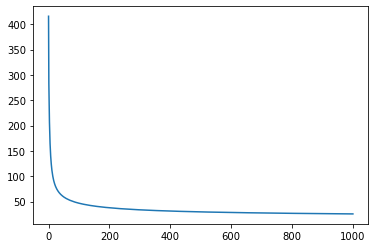

Final cross-entropy cost:  25.63529203959107


In [12]:
# Initialize weights
w0 = np.random.randn(n, 1)

# Initialize logistic regression model
model = LogisticCost()

# Run gradient descent
w, gd = gradient_descent_execution(X_train, w0, z_train, model, mode="normal", max_iter = 1000, eta = 0.01)


#print(gd.costs)
# Plot the cost function
plt.plot(gd.costs)
plt.show()

print("Final cross-entropy cost: ", gd.costs[-1])

In [13]:
def prediction_score(z, z_pred):
    return np.count_nonzero(z.reshape(-1, 1) == z_pred.reshape(-1, 1)) / z.size

In [14]:
z_pred = model.predict_class(X_test, w)
print("Prediction score:", prediction_score(z_test, z_pred))

Prediction score: 0.9824561403508771


Using SDG without any further alterations gives us an impressive prediction score of 98.2%.

## Classification as a Function of Hyper-Parameters

First, we study the loss as a function of learning rate

In [15]:
costs = []
pred_scores = []


etas = np.linspace(0.0001, 0.1, 100)

for eta in etas:
    w, gd = gradient_descent_execution(X_train, w0, z_train, model, mode="normal", max_iter = 200, eta = eta)
    costs.append(gd.costs[-1])
    z_pred = model.predict_class(X_test, w)
    pred_scores.append(prediction_score(z_test, z_pred))

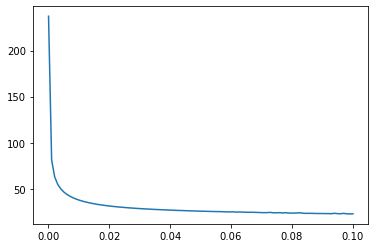

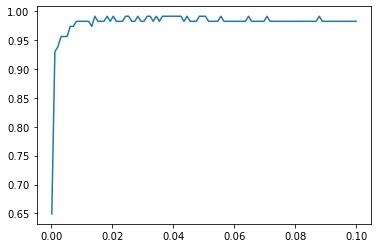

In [16]:
plt.plot(etas, costs)
plt.show()

plt.plot(etas, pred_scores)
plt.show()

In [17]:
print(costs)

[237.265730425904, 81.20944965676028, 62.803744111810516, 54.666359372319164, 49.7472580283348, 46.32926895860865, 43.76267592998157, 41.7452025064936, 40.09414142464831, 38.72126369572082, 37.54819209986674, 36.53730676623425, 35.64881552133431, 34.87917199235822, 34.16535062618067, 33.53695038356549, 32.96754057459566, 32.45532995920199, 31.996007085128923, 31.54712564610285, 31.14425718892298, 30.77544634387879, 30.42938458367872, 30.107428843497615, 29.8241479916312, 29.52277435767673, 29.258962356011445, 29.017447703912566, 28.78774461937253, 28.55225656182217, 28.347031814780006, 28.14965823813104, 27.94554115634483, 27.795846787511984, 27.59034998073879, 27.415210460734414, 27.304622909937343, 27.131045797602177, 26.994418413353877, 26.820370028586893, 26.68646031785223, 26.56683288211432, 26.416121880322834, 26.366006379070043, 26.204578451612583, 26.099712387402093, 25.955247199100505, 25.84599803170712, 25.772688798487174, 25.653159597477835, 25.537295465406118, 25.4983534633

As we can see, a higher learning rate leads to faster convergence given the few epochs provided. However, we also note that SDG starts diverging at $\eta \approx 0.1$

We repeat for a higher number of epochs

In [18]:
costs = []
pred_scores = []


etas = np.linspace(0.0001, 0.1, 100)

for eta in etas:
    w, gd = gradient_descent_execution(X_train, w0, z_train, model, mode="normal", max_iter = 1000, eta = eta)
    costs.append(gd.costs[-1])
    z_pred = model.predict_class(X_test, w)
    pred_scores.append(prediction_score(z_test, z_pred))

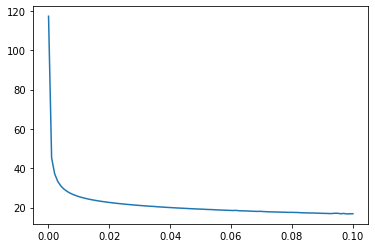

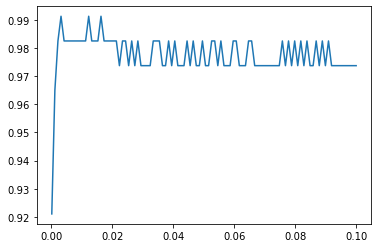

In [19]:
plt.plot(etas, costs)
plt.show()

plt.plot(etas, pred_scores)
plt.show()

In [20]:
print(costs)

[117.27691571764765, 45.250225451655375, 37.14998111333911, 33.33080619011323, 31.024425175917727, 29.45091861516115, 28.291093757734394, 27.391198120784228, 26.662980166980162, 26.060855385080107, 25.54427778412712, 25.0975598173307, 24.704961442513806, 24.35222354103004, 24.03674211457607, 23.74620589989664, 23.484992921824368, 23.23854195806646, 23.01194784919057, 22.795195267778325, 22.593901382585248, 22.40558877204659, 22.226679154515317, 22.05946670467808, 21.895930649037396, 21.743440167795892, 21.597653805935835, 21.456893293474373, 21.328366198089732, 21.190946363317813, 21.075776905529573, 20.940274161418237, 20.821463795476706, 20.708947321250278, 20.644325158987478, 20.50231382314815, 20.38879634070388, 20.288783535095106, 20.19148304805313, 20.09567745518555, 20.00637755557157, 19.913262923000126, 19.824838041401783, 19.744280521326584, 19.670676519275926, 19.57864253692476, 19.497821200267072, 19.420737429306975, 19.341843244287286, 19.280052926062925, 19.22371715053425,

In [21]:
w, gd = gradient_descent_execution(X_train, w0, z_train, model, mode="normal", max_iter = 1000, eta = 0.01)

In [22]:
print(gd.costs)

[415.60976531 281.22197942 236.9725439  ...  25.64500906  25.64021549
  25.63606106]


In [36]:
costs = []
pred_scores = []


etas = np.linspace(1e-2, 1, 10)

for eta in etas:
    w, gd = gradient_descent_execution(X_train, w0, z_train, model, mode="normal", max_iter = 1000, eta = eta)
    costs.append(gd.costs[-1])
    z_pred = model.predict_class(X_test, w)
    pred_scores.append(prediction_score(z_test, z_pred))

In [37]:
print(etas)

[0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]


[4.15609765e+02 1.23646613e+04 6.07899889e+02 ... 4.36762317e+00
 7.10512713e+01 1.95497705e+01]


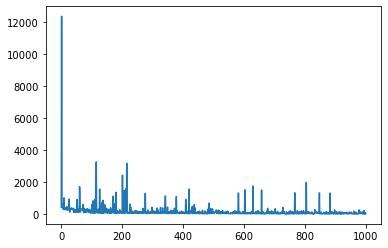

In [56]:
w, gd = gradient_descent_execution(X_train, w0, z_train, model, mode="normal", max_iter = 1000, eta = 10)
plt.plot(gd.costs)
print(gd.costs)

[415.60976531  58.77070503  48.1477514  ...  13.84841982  11.84211697
  15.53667816]


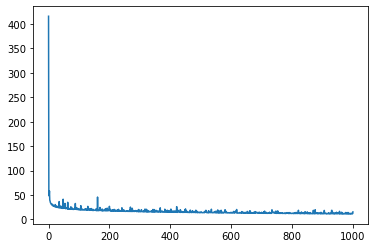

In [52]:
w, gd = gradient_descent_execution(X_train, w0, z_train, model, mode="normal", max_iter = 1000, eta = 0.4)
plt.plot(gd.costs)
print(gd.costs)

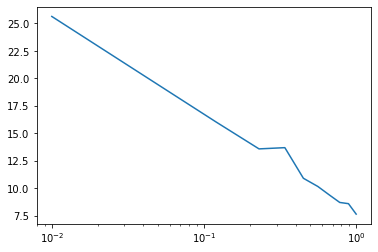

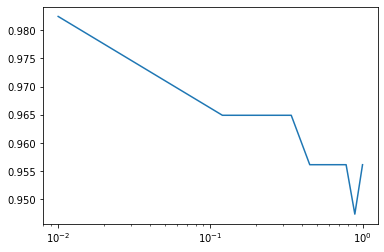

In [38]:
plt.semilogx(etas, costs)
plt.show()

plt.semilogx(etas, pred_scores)
plt.show()